<div class="alert alert-block alert-danger">
    
### Notes - Beginnings

</div>

#### Measures, Distributions, Central Limit Theorem, Hypothesis Testing, Confidence Intervals, Numerical python, $ \ldots $.

***

Let $\Omega$ be a non-empty set and $\mathcal{P}(\Omega)$ be the powerset of $\Omega$. $\mathcal{F} \subseteq \mathcal{P}(\Omega)$ is a $\sigma\text{-algebra}$ on $\Omega$ if

- $\Omega \in \mathcal{F}$
- $A \in \mathcal{F} \implies \Omega \setminus A \in \mathcal{F}$
- $A_i \in \mathcal{F}$, $\forall i \in \mathbb{N} \implies \cup_{i \in \mathbb{N}} A_i \in \mathcal{F}$

If $\mathcal{F}$ is a $\sigma\text{-algebra}$ on $\Omega$,
- $\emptyset \in \mathcal{F}$
- $\cap_{i \in \mathbb{N}} A_i = (\cup_{i \in \mathbb{N}} A^c_i)^c \in \mathcal{F}$

$(\Omega, \mathcal{F})$ is a measurable space if $\mathcal{F}$ is a $\sigma \text{-algebra}$ on $\Omega$

$\mu : (\Omega, \mathcal{F}) \rightarrow \mathbb{R}_{\ge 0}$ is a measure on $\mathcal{F}$ if 

- $\forall A \in \mathcal{F}$, $\mu(A) \ge 0$
- $\mu(\emptyset) = 0$
- $\mu(\cup_{i \in \mathbb{N}}A_i) = \Sigma_{i \in \mathbb{N}} \mu(A_i)$, for any countable disjoint sets $\{A_i\}$ in $\mathcal{F}$.

$(\Omega, \mathcal{F}, \mu)$ is a measure space.

$\mathbb{P}$ is a probability measure on $\Sigma$ if $\mathbb{P}$ is a measure and $\mathbb{P}(\Omega) = 1$ 

$(\Omega, \mathcal{F}, \mathbb{P})$ is a probability measure space.

$f : (\Omega, \mathcal{F}, \mu) \rightarrow (\Omega^{\prime}, \mathcal{F}^{\prime})$ is measurable if $f^{-1}(U) \in \mathcal{F}$, $\forall U \in \mathcal{F}^{\prime}$

If $(\Omega, \mathcal{F}, \mathbb{P})$ is a probability measure space and $(\Omega^{\prime}, \mathcal{F}^{\prime})$ is measurable, then measurable function $f : (\Omega, \mathcal{F}, \mathbb{P}) \rightarrow (\Omega^{\prime}, \mathcal{F}^{\prime})$ is a random variable.
<br/><br/>

***

Let $X$ be an integrable $\mathbb{R}$-valued random variable on a probability measure space $(\Omega, \Sigma, f)$.

- $\mathbb{E}[X] := \int X dF$
- $Var(X) := \mathbb{E}[(X - \mu)^2] = \mathbb{E}[X^2] - \mu^2 =  \int (X - \mu)^2 dF$
- $Cov(X, Y) := \mathbb{E}[(X-\mu_X)(Y-\mu_Y)] = \mathbb{E}[XY] - \mu_X \mu_Y$
- Holder's Inequality. $| \mathbb{E}[X] | \le (\mathbb{E}[|X|^p])^\frac{1}{p}$, $\forall p \in [1, \infty)$
- Jensen's Inequality. if $g$ is convex, $\mathbb{E}[g(X)] \ge g(\mathbb{E}[X])$
- Conditional expectation. $\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X \mid Y]]$
- Conditional variance. $Var(X) = \mathbb{E}[Var(X \mid Y)] + Var(\mathbb{E}[X \mid Y])$

***

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sm
import statsmodels.formula.api as smf

import scipy as sp

In [3]:
plt.close('all')

seed=1234
np.random.seed(seed)
rng=np.random.default_rng(seed)

#### Central Limit Theorem

Let $\bigl\{X_i\bigr\}_{i=1}^n$ be random variables from some distribution, with finite mean $\mu$ and finite variance $\sigma^2$, $ \forall{i}$

> $\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$ $\text{as}\ {n\to\infty}$

> $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim \mathcal{N}\left(0,1\right)$ $\text{as}\ {n\to\infty}$

$ X \sim \mathcal{\chi^2_3} \implies $
$ \mu = 3.0$, $\sigma^2 = 6.0$
<p>
WTS: $\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$ $\text{as}\ {n\to\infty}$

Mean: 3.0, Var: 6.0, Skew: 1.632993161855452, Kurtosis: 4.0
Sample Mean: 2.997171242823047, Sample Var: 0.1521316639076668


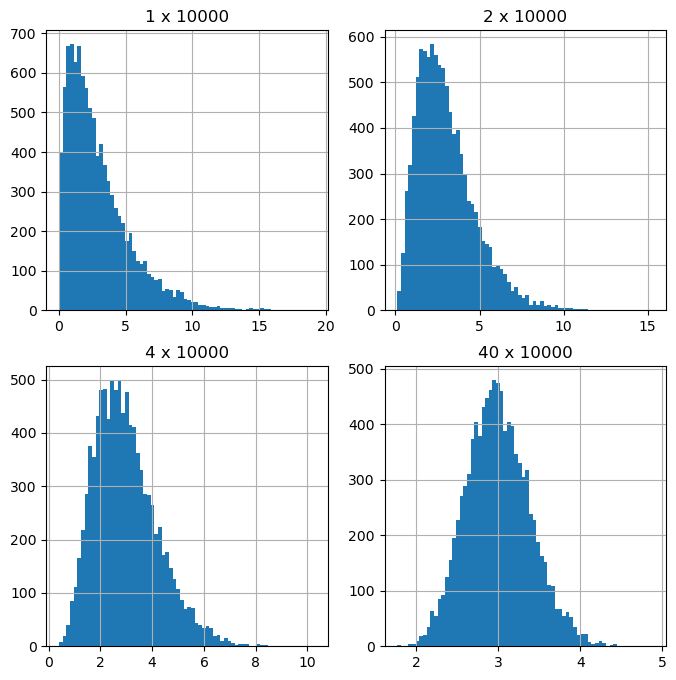

In [4]:
uniform_dist = sp.stats.uniform()
chi2 = sp.stats.chi2(3)
print('Mean: {}, Var: {}, Skew: {}, Kurtosis: {}'.format(*chi2.stats(moments='mvsk')))

plt.figure(figsize=(8,8))

num_of_samples = [1, 2, 4, 40]
size = 10000

for i, n in enumerate(num_of_samples):
    plt.subplot(2, 2, i+1)
    plt.title(f'{n} x {size}')
    df=pd.DataFrame(chi2.rvs(size=(n, size), random_state=rng))
    df.mean().hist(bins=70)
print(f'Sample Mean: {df.mean().mean()}, Sample Var: {df.mean().var()}')

<div class="alert alert-block alert-danger">
    
#### Likelihood
    
</div>

***

### Likelihood (assumption of independence)

$L\left( \theta \mid \mathbf{x} \right) = P \{ X_1 = x_1, X_2 = x_2, \ldots, X_n = x_n \mid \theta \} = \prod^{n}_{i=1} f \left( x_i \mid \theta \right)$

***

### Maximum likelihood

Independent bernoulli distributed random variables

$ L \left( \theta \mid \mathbf{x} \right) = \prod^{n}_{i=1} \theta^{x_i} \left( 1-\theta \right)^{1-x_i} = \theta^{\sum^{n}_{i=1} x_i } \left( 1-\theta \right)^{n - \sum^{n}_{i=1} x_i }$

$ l(\theta \mid \mathbf{x}) = log \left( L\left( \theta \mid \mathbf{x} \right) \right) = \left( \sum^{n}_{i=1} x_i \right) log \theta + \left( n-\sum^{n}_{i=1} x_i \right) log \left( 1-\theta \right) $

$ \frac{dlog\left(L\left(\theta \mid \mathbf{x} \right)\right)}{d\theta} = \frac{\sum^{n}_{i=1} x_i}{\theta} - \frac{n-\sum^{n}_{i=1} x_i}{1-\theta} $

$ \frac{dlog\left(L\left(\theta \mid \mathbf{x} \right)\right)}{d\theta} = 0 \implies \theta = \frac{1}{n} \sum^{n}_{i=1} x_i $

<br><br>
Independent normally distributed random variables

$ L \left( \mu , \sigma^2 \mid \mathbf{x} \right) = \prod^{n}_{i=1} \frac{1}{\sqrt{2\pi \sigma^2}} \exp{\frac{-(x_i-\mu)^2}{2\sigma^2}} = (2\pi)^{\frac{-n}{2}} (\sigma^2)^{-\frac{n}{2}} \exp{\frac{-1}{2\sigma^2}\sum^n_{i=1}(x_i-\mu)^2} $

$ l \left( \mu , \sigma^2 \mid \mathbf{x} \right) = log\left(L\left(\mu,\sigma^2 \mid \mathbf{x}  \right)\right) = (-\frac{n}{2})log(2\pi)-\frac{n}{2}log(\sigma^2)-\frac{1}{2\sigma^2} \sum^{n}_{i=1} (x_i-\mu)^2 $

$ \frac{\partial log(L(\mu,\sigma^2 \mid \mathbf{x} ))}{\partial \mu} = \frac{\sum^{n}_{i=1}(x_i-\mu)}{\sigma^2} $

$ \implies \mu = \frac{1}{n}\sum^{n}_{i=1} x_i$

$ \frac{\partial log(L(\mu, \sigma^2 \mid \mathbf{x} ))}{\partial \sigma^2} = -\frac{n}{2\sigma^2}+\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2} $

$ \implies -n\sigma^2 + \sum^n_{i=1}(x_i-\mu)^2 = 0 $

$ \implies \sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-\mu)^2 $

***

### Unbiased estimator of $ \sigma^2 $

$ \text{NTS: } \mathbb{E}[S^2] = \sigma^2 $

$ \mathbb{E}[S^2] = \mathbb{E}[\frac{(n-1)S^2}{\sigma^2} . \frac{\sigma^2}{(n-1)}] = \frac{\sigma^2}{(n-1)} \mathbb{E}[\frac{(n-1)S^2}{\sigma^2}] = \sigma^2 $

***

<div class="alert alert-block alert-danger">
    
#### Confidence Intervals, Hypothesis Testing
    
</div>

### $ (1-\alpha)\% $ confidence interval for a mean $ \mu $

$
\begin{align}
P\bigl\{-z_{\frac{\alpha}{2}} \leq Z \leq z_{\frac{\alpha}{2}} \bigr\} &= P\bigl\{-z_{\frac{\alpha}{2}} \leq \frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \leq z_{\frac{\alpha}{2}} \bigr\} = 1 - \alpha
\end{align}
$

> $\mu \in \left[\bar{X} \pm Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}}\right) \right]$

$
\begin{align}
P\bigl\{-t_{\frac{\alpha}{2},n-1} \leq T_{n-1} \leq t_{\frac{\alpha}{2},n-1} \bigr\} &= P\bigl\{-t_{\frac{\alpha}{2},n-1} \leq \frac{\bar{X}-\mu}{S/\sqrt{n}} \leq t_{\frac{\alpha}{2},n-1} \bigr\} = 1 - \alpha
\end{align}
$

> $\mu \in \left[\bar{X} \pm T_{\frac{\alpha}{2}, n-1} \left(\frac{S}{\sqrt{n}}\right) \right]$


In [32]:
# alpha=95%, n = 126, Sample mean = 29.2, standard deviation = 7.5

print('Normal CI: {}'.format(sp.stats.norm.interval(confidence=0.95, loc=29.2, scale=7.5/np.sqrt(126))))
print('T CI: {}'.format(sp.stats.t.interval(df=125, confidence=0.95, loc=29.2, scale=7.5/np.sqrt(126))))

print('\nParametric hypothesis ttest: {}'.format(sp.stats.ttest_1samp(sp.stats.norm.rvs(size=50, random_state=rng), popmean=0)))
print('Non-Parametric hypothesis ttest: {}'.format(sp.stats.wilcoxon(sp.stats.norm.rvs(size=50, random_state=rng))))

Normal CI: (27.890443978470504, 30.509556021529495)
T CI: (27.877642081557592, 30.522357918442406)

Parametric hypothesis ttest: Ttest_1sampResult(statistic=-1.0406854963173642, pvalue=0.30312938269964407)
Non-Parametric hypothesis ttest: WilcoxonResult(statistic=539.0, pvalue=0.34720687274462314)


***

### Confidence Intervals for the difference of two means

#### Two-Sample Pooled t-Interval (independent and normally distributed with a common variance $\sigma^2$)

$\bigl\{X_i\bigr\}^n_{i=1} \sim \mathcal{N}(\mu_{X}, \sigma^2)$, $\bigl\{Y_i\bigr\}^m_{i=1} \sim \mathcal{N}(\mu_{Y}, \sigma^2)$

$\bar{X} \sim \mathcal{N}(\mu_{X}, \frac{\sigma^2}{n})$, $\bar{Y} \sim \mathcal{N}(\mu_{Y}, \frac{\sigma^2}{m})$

$\bar{X} - \bar{Y} \sim \mathcal{N}(\mu_{X}-\mu_{Y}, \frac{\sigma^2}{n}+\frac{\sigma^2}{m})$

$\frac{(\bar{X} - \bar{Y})-(\mu_{X}-\mu_{Y})}{\sqrt{\frac{\sigma^2}{n}+\frac{\sigma^2}{m}}} \sim \mathcal{N}(0,1)$

<hr>

$\frac{(n-1)S_{X}^2}{\sigma^2} \sim \chi^2_{(n-1)}$, $\frac{(m-1)S_{Y}^2}{\sigma^2} \sim \chi^2_{(m-1)}$

$\frac{(n-1)S_{X}^2}{\sigma^2} +  \frac{(m-1)S_{Y}^2}{\sigma^2} \sim \chi^2_{(n+m-2)}$

$T_{n+m-2} \sim [\frac{(\bar{X} - \bar{Y})-(\mu_{X}-\mu_{Y})}{\sqrt{\frac{\sigma^2}{n}+\frac{\sigma^2}{m}}}] /
[\sqrt{   \frac{    \frac{(n-1)S_{X}^2}{\sigma^2}   +   \frac{(m-1)S_{Y}^2}{\sigma^2}     }     {(n+m-2)}}] /
= \frac{(\bar{X}-\bar{Y})-(\mu_X-\mu_Y)}{S_p \sqrt{\frac{1}{n}+\frac{1}{m}}}, S_p^2=\frac{(n-1)S^2_X+(m-1)S^2_Y}{n+m-2}$

$(\mu_{X} - \mu_{y}) \in \left[ (\bar{X}-\bar{Y}) \pm T_{(\alpha/2, n+m-2)} \sqrt{\frac{(n-1)S_{X}^2 + (m-1)S_{Y}^2}{(n+m-2)}} \sqrt{\frac{1}{n}+\frac{1}{m}} \right]$

In [148]:
data1 = np.array([12.9,10.2,7.4,7.0,10.5,11.9,7.1,9.9,14.4,11.3])
data2 = np.array([10.2,6.9,10.9,11.0,10.1,5.3,7.5,10.3,9.2,8.8])

compare_means_res = sm.CompareMeans(sms.DescrStatsW(data1), sms.DescrStatsW(data2))

print('Normal CI: {}'.format(compare_means_res.zconfint_diff(usevar='pooled')))
print('T CI: {}'.format(compare_means_res.tconfint_diff(usevar='pooled')))

print('\nParametric hypothesis ttest: {}'.format(sp.stats.ttest_ind(data1, data2, equal_var=True)))
print('Non-Parametric hypothesis ttest: {}'.format(sp.stats.mannwhitneyu(data1, data2)))

Normal CI: (-0.7116710365984205, 3.1916710365984207)
T CI: (-0.8520326742900659, 3.3320326742900663)

Parametric hypothesis ttest: Ttest_indResult(statistic=1.2452689491491107, pvalue=0.22900078577218805)
Non-Parametric hypothesis ttest: MannwhitneyuResult(statistic=65.5, pvalue=0.25666036991585695)


#### Welch T-Interval (independent and normally distributed with unequal variances)

In [149]:
print('Normal CI: {}'.format(compare_means_res.zconfint_diff(usevar='unequal')))
print('T CI: {}'.format(compare_means_res.tconfint_diff(usevar='unequal')))

print('\nParametric hypothesis ttest: {}'.format(sp.stats.ttest_ind(data1, data2, equal_var=False)))
print('Non-Parametric hypothesis ttest: {}'.format(sp.stats.mannwhitneyu(data1, data2)))

Normal CI: (-0.7116710365984202, 3.1916710365984207)
T CI: (-0.8633815129922375, 3.343381512992238)

Parametric hypothesis ttest: Ttest_indResult(statistic=1.245268949149111, pvalue=0.23018336828903668)
Non-Parametric hypothesis ttest: MannwhitneyuResult(statistic=65.5, pvalue=0.25666036991585695)


#### Pair T-Interval (dependent and normally distributed)

In [150]:
print('\nParametric hypothesis ttest: {}'.format(sp.stats.ttest_rel(data1, data2)))
print('Non-Parametric hypothesis ttest: {}'.format(sp.stats.wilcoxon(data1, data2)))


Parametric hypothesis ttest: Ttest_relResult(statistic=1.1299529294067667, pvalue=0.28771004724009536)
Non-Parametric hypothesis ttest: WilcoxonResult(statistic=19.0, pvalue=0.431640625)


***

### $ (1-\alpha)\% $ confidence interval for a variance $ \sigma^2 $

Let $ \bigl\{ X_i \bigr\}^{n}_{i=1} $ be normally distributed.

Let $ a = \chi^2_{1-\alpha / 2 \text{, } n-1}$ and $ b = \chi^2_{\alpha /2 \text{,} n-1} $

$ \frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{n-1} $

$ P \bigl\{ a \le \frac{(n-1)S^2}{\sigma^2} \le b \bigr\} = 1-\alpha$

$ \frac{(n-1)S^2}{b} \le \sigma^2 \le \frac{(n-1)S^2}{a} $

$ \sigma^2 \in [\frac{(n-1)S^2}{b}, \frac{(n-1)S^2}{a}]$

***

### $ (1-\alpha)\% $ confidence interval for the ratio of two variances $ \frac{\sigma_{X}^2}{\sigma_{Y}^2} $

$ \bigl\{ X_i \bigr\}^{n}_{i=1} \sim \mathbf{N}(\mu_X, \sigma^2_X) $ and $ \bigl\{ Y_i \bigr\}^{m}_{i=1} \sim \mathbf{N}(\mu_Y, \sigma^2_Y) $

Let $ a = \mathcal{F}_{1-\alpha / 2 \text{, } (m-1, n-1)}$ and $ b = \mathcal{F}_{\alpha /2 \text{,} (m-1, n-1)} $

$ \frac{\sigma_{X}^2}{\sigma_{Y}^2} \frac{S_{Y}^2}{S_{X}^2} \sim F(m-1, n-1) $

$ \frac{\sigma^2_X}{\sigma^2_Y} \in  [a \frac{S^2_X}{S^2_Y}, b \frac{S^2_X}{S^2_Y}]$

***

### Sample size

$
\begin{align}
\bar{X} \pm \epsilon &= \bar{X} \pm t_{\frac{\alpha}{2},n-1}(S / \sqrt{n}) \\
\epsilon &= t_{\frac{\alpha}{2},n-1}(S / \sqrt{n}) \\
n &= (t_{\frac{\alpha}{2},n-1})^2 (S / \epsilon)^2 \\
&\approx (z_{\frac{\alpha}{2}})^2 (S / \epsilon)^2 \\
\end{align}
$

***

#### Hypothesis test for variances

One variance $\mathcal{H}_0 : \sigma^2$ vs $\mathcal{H}_A $ via $\chi^2 \sim \frac{(n-1)S^2}{\sigma^2} $

Two variances $\mathcal{H}_0 : \sigma^2_X = \sigma^2_Y$ via $\frac{S^2_X}{S^2_Y} \frac{\sigma^2_Y}{\sigma^2_X} $ from F distribution

***

#### Non-Parametric: $ \chi^2 $ Goodness-of-Fit

$ \chi^2_{k-1} = \sum_{i=1}^{k} \frac{\bigl( Observed - Expected \bigr)^2}{Expected} $

***

#### Non-Parametric: Kolmogorov-Smirnov Goodness-of-Fit

In [152]:
unif_sim_data = sp.stats.uniform(0, 2).rvs(size=10000, random_state=rng)
print(stats.kstest(unif_sim_data, 'uniform', args=(0, 2)))

norm_sim_data = sp.stats.norm(120, 10).rvs(size=10000, random_state=rng)
print(stats.kstest(norm_sim_data, 'norm', args=(120,10)))

KstestResult(statistic=0.005949926573730946, pvalue=0.8686889374879863)
KstestResult(statistic=0.006691781243084671, pvalue=0.7590729800823497)


<div class="alert alert-block alert-danger">
    
#### Distributions
    
</div>

***

### Normal distribution

Normal...

> $X \sim \mathcal{N}\left(\mu, \sigma^2\right)$

> $Z = \frac{X-\mu}{\sigma} \sim \mathcal{N}\left(0,1\right)$

> $ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} $, $x \in (-\infty, \infty)$

Multivariate normal...

> $ \mathbf{x} \sim \mathcal{N}\left( \mathbf{\mu}, \Sigma \right) $, $\mathbf{x} \in \mathbb{R}^n$, $\Sigma \in \mathbb{R}^{n \times n}$

> $ f(\mathbf{x}) = (2\pi)^{-n/2} (\|\Sigma\|)^{-1/2} e^{\{ -\frac{1}{2} (\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) \}} $

> $ (\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) $ is the squared Mahalanobis distance between $\mathbf{x}$ and $\mathbf{\mu}$ with the prediction ellipse centered at $\mathbf{\mu}$.

>$ (\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) \sim \chi^2_n$

>$P\{ (\mathbf{x} - \mathbf{\mu})^T \sum^{-1} (\mathbf{x} - \mathbf{\mu}) \leq \chi^2_{n,\alpha} \} = 1 - \alpha  $

>$ \mathbf{\bar{x}} \sim \mathcal{N}\left( \mathbf{\mu}, \frac{\Sigma}{n} \right) $

>Let $ \mathbf{y} := \mathbf{c}^T \mathbf{x} $

>Then $ \mathbf{y} \sim \mathcal{N} \left( \mathbf{c}^T\mathbf{\mu_{x}} \text{, } \mathbf{c}^{T} \Sigma_{x} \mathbf{c} \right) $

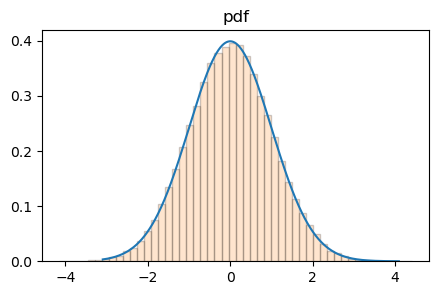

In [158]:
norm = sp.stats.norm()
norm_domain = np.linspace(norm.ppf(0.001), norm.ppf(0.999)+1, 1000)

plt.figure(figsize=(5,3))
plt.title('pdf')
plt.plot(norm_domain, norm.pdf(norm_domain), label='pdf')
plt.hist(norm.rvs(size=100000, random_state=rng), bins=50, alpha=0.2, density=True, edgecolor='k', label='hist');

***

### $\chi^2$ distribution

Let $\bigl\{X_i\bigr\}_{i=1}^n$ be independent normal random variables with means $\bigl\{\mu_i\bigr\}_{i=1}^n$ and variances $\bigl\{\sigma^2_i\bigr\}_{i=1}^n$,

> $X_i \sim \mathcal{N}\left(\mu_i,\sigma^2_i \right) \text{, } \forall{i}$

> $ \sum_{i=1}^n \left( \frac{X_i - \mu_i}{\sigma_i} \right)^2 \sim \chi_n^2$

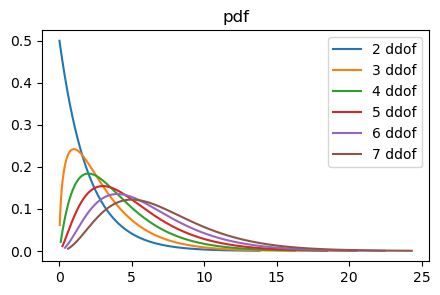

In [159]:
plt.figure(figsize=(5,3))
plt.title('pdf')

for ddof in range(2, 8):
    chi2 = sp.stats.chi2(ddof)
    chi2_domain = np.linspace(chi2.ppf(0.001), chi2.ppf(0.999), 1000)
    plt.plot(chi2_domain, chi2.pdf(chi2_domain), label=f'{ddof} ddof')
plt.legend();

***

### T distribution

> $Z \sim \mathcal{N}\left(0,1 \right)$, $U \sim \chi^2_r \implies \frac{Z}{\sqrt{U/r}} \sim T_{r}$

> $\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right) \implies \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim \mathcal{N}\left(0,1\right)$

> $\frac{\left(n-1\right)S^2}{\sigma^2} \sim \chi^2_{n-1}$


> $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \text{.}\ \frac{\sigma}{S} = \frac{\bar{X}-\mu}{S/\sqrt{n}} \sim T_{n-1}$

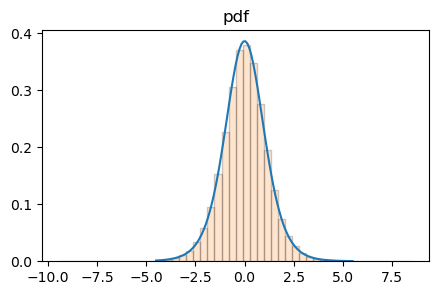

In [160]:
tdist = sp.stats.t(8)
tdist_domain = np.linspace(tdist.ppf(0.001), tdist.ppf(0.999)+1, 100)

plt.figure(figsize=(5,3))
plt.title('pdf')
plt.plot(tdist_domain, tdist.pdf(tdist_domain), label='pdf')
plt.hist(tdist.rvs(size=100000, random_state=rng), bins=50, alpha=0.2, density=True, edgecolor='k', label='hist');

***

### F distribution

> $U \sim \chi^2_{r_1}$, $V \sim \chi^2_{r_2}$

> $\frac{U/r_1}{V/r_2} \sim F_{r_1, r_2}$

***

### Binomial distribution

$X \sim B(n, p)$,  $P\{X=x\} = \binom{n}{x} p^x (1-p)^{n-x}$, $x \in [0, n]$

$\mu_X = np$, $\sigma_X = np(1-p)$

***

### Poisson distribution

#### $X \sim \text{Poisson}(\lambda)$

$
\begin{align}
P\{X=x\} &= lim_{n\to\infty} \binom{n}{x} (\frac{\lambda}{n})^x (1-\frac{\lambda}{n})^{n-x} \\
&= e^{-\lambda} \frac{\lambda^x}{x!}
\end{align}
$

$\mu_X = \lambda$, $\sigma_X = \lambda$

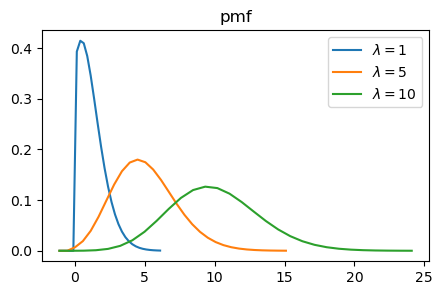

In [161]:
poisson = sp.stats.poisson(3)

plt.figure(figsize=(5,3))
plt.title('pmf')
for i in [1, 5, 10]:
    poisson = stats.poisson(i)
    poisson_domain = np.linspace(poisson.ppf(0)-0.1, poisson.ppf(0.9999)+0.1, 30)
    plt.plot(poisson_domain, poisson.pmf(poisson_domain), label=r'$\lambda=$'+str(i))
plt.legend();

***

### Geometric distribution

#### $X \sim \text{Geometric}(p)$,  $P\{X=x\} = p (1-p)^{x-1}$, $\mu_X = \frac{1}{p}$, $\sigma_X = \frac{1-p}{p^2}$
> Interpretation: Number of trials needed until the first success

#### $X^\prime \sim \text{Geometric}(p)$,  $P\{X=x\} = p (1-p)^{x}$, $\mu_X = \frac{1-p}{p}$, $\sigma_X = \frac{1-p}{p^2}$
> Interpretation: Number of failures needed before the first success

***

### Negative Binomial distribution

#### $X \sim \text{NBinomial}(r, p)$, $P\{X=x\} = \binom{x-1}{r-1} p^r (1-p)^{x-r}$, $\mu_X = \frac{r}{p}$, $\sigma_X = \frac{r(1-p)}{p^2}$
> Interpretation: Number of trials needed until r successes

#### $X^\prime \sim \text{NBinomial}(r, p)$, $P\{X=x\} = \binom{r+x-1}{x} p^r (1-p)^{x}$, $\mu_X = \frac{r(1-p)}{p}$, $\sigma_X = \frac{r(1-p)}{p^2}$
> Interpretation: Number of failures needed before r success

***

### Hypergeometric distribution

#### $X \sim \text{HyperGeometric}(N, n, m)$, $P\{X=x\} = \frac{\binom{m}{x} \binom{N-m}{n-x} }{\binom{N}{n}} $, $x \in [0, min(n, m)]$, $\mu_X = \frac{nm}{N}$

***

### Multinomial distribution

#### $X \sim \text{Multinomial}(N, \{p_k\})$, $f\left(\mathbf{x}\right) = \frac{N!}{\Pi_{\forall k} {x_k}!} \Pi_{\forall k} p_k^{x_k}$

***

### Uniform distribution

#### $X \sim U(\alpha, \beta)$, $f(x) = \frac{1}{\beta-\alpha}$

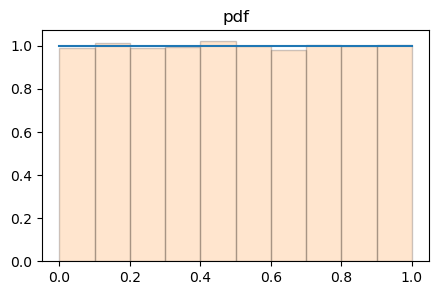

In [136]:
unif = sp.stats.uniform()

plt.figure(figsize=(5,3))
plt.title('pdf')
unif_domain = np.linspace(0, 1, 100)
plt.plot(unif_domain, unif.pdf(unif_domain), label='pdf')
plt.hist(unif.rvs(size=100000, random_state=rng), edgecolor='k', alpha=0.2, density=True, label='hist');

***

### Exponential distribution

#### $X \sim Exponential(\theta)$

$
\begin{align}
F_{W}(w) &= P\{W \le w\} \\
&= 1 - P\{W \gt w\} \\
&= 1 - e^{-\lambda w}
\end{align}
$

$f(w) = \lambda e^{-\lambda w}$

$\mu = \frac{1}{\lambda}, \sigma^2=\frac{1}{\lambda^2}, \theta=\frac{1}{\lambda}$


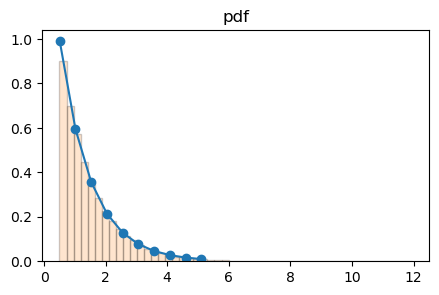

In [137]:
expon = sp.stats.expon(0.5)

plt.figure(figsize=(5,3))
plt.title('pdf')
expon_domain =  np.linspace(expon.ppf(0.01), expon.ppf(0.99), 10)
plt.plot(expon_domain, expon.pdf(expon_domain), marker='o', label='pdf')
plt.hist(expon.rvs(size=100000, random_state=rng), bins=50, edgecolor='k', density=True, alpha=0.2, label='hist');

***

### Beta distribution

#### $X_1 \sim Gamma(\alpha, \theta)$, $X_2 \sim Gamma(\beta, \theta)$
<br>
$Y = f(X_1, X_2) \sim \text{Beta}(\alpha, \beta, \theta)$

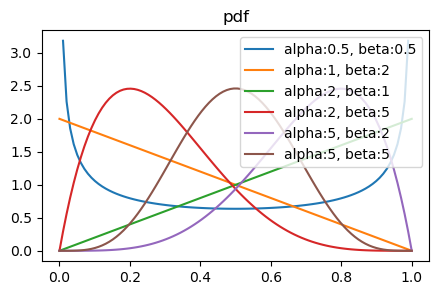

In [109]:
domain = np.linspace(0, 1, 100)
alphas_betas = [(0.5,0.5), (1,2), (2,1), (2,5), (5,2), (5,5)]

plt.figure(figsize=(5,3))
plt.title('pdf')
for ab in alphas_betas:
    alpha, beta = ab
    beta_dist = sp.stats.beta(alpha, beta)
    plt.plot(domain, beta_dist.pdf(domain), label=f'alpha:{alpha}, beta:{beta}')
plt.legend();

<div class="alert alert-block alert-danger">
    
#### Analysis of variance
    
</div>

### ANOVA

- $ \mathbf{H}_{0} : \mu_i = \mu_j, \forall i, j $
- $ \mathbf{H}_{A} : \mu_i \neq \mu_j, \exists i, j $

In [4]:
norm_df = pd.DataFrame(np.random.randn(80), columns=['Sample'])
norm_df['Type'] = np.random.choice(['Cat1', 'Cat2', 'Cat3', 'Cat4'], len(norm_df))
norm_df.head()

,Sample,Type
0,0.471435,Cat4
1,-1.190976,Cat1
2,1.432707,Cat1
3,-0.312652,Cat2
4,-0.720589,Cat2


In [5]:
norm_df['Type'].value_counts()

Cat2    25
Cat4    22
Cat1    20
Cat3    13
Name: Type, dtype: int64

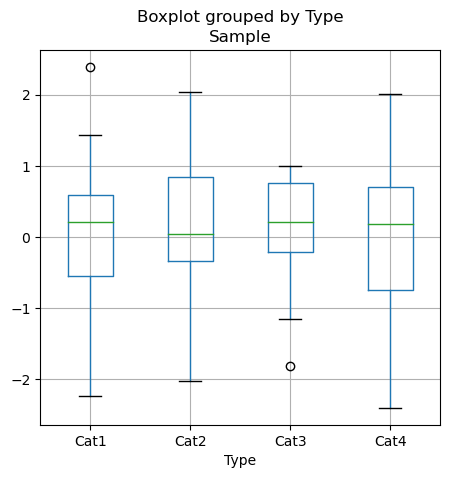

In [6]:
norm_df.boxplot('Sample', by='Type', figsize=(5,5));

In [9]:
norm_df_ols = smf.ols('Sample ~ Type', norm_df).fit()
sm.anova_lm(norm_df_ols, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Type,3.0,0.362235,0.120745,0.120536,0.947753
Residual,76.0,76.131547,1.001731,NaN,NaN
